In [227]:
#load in packages
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import contextily as cx
import warnings
import os

In [228]:
#Read in dpdcalls data set
dpdcalls = gpd.read_file('/Users/sadiesheridan/Desktop/dpdshapefile/dpdshapefile.shp')
dpdcalls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [229]:
#Read in policebeats data set
policebeats = gpd.read_file('/Users/sadiesheridan/Desktop/Police_Beats/Police_Beats.shp')
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [230]:
#Print .info() for policebeats
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    119 non-null    int64   
 1   PERIMETER   119 non-null    float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     119 non-null    object  
 5   LAWBEAT     119 non-null    int64   
 6   CAD         119 non-null    object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  119 non-null    float64 
 9   ShapeSTLen  119 non-null    float64 
 10  geometry    119 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 10.4+ KB


In [231]:
#Print .info() for dpdcalls
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 331077 entries, 0 to 331076
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  331077 non-null  int64   
 1   Case Numbe  45954 non-null   object  
 2   Call Date   331077 non-null  object  
 3   Call Time   331077 non-null  object  
 4   Source      331077 non-null  object  
 5   Priority    330425 non-null  object  
 6   Nature      331076 non-null  object  
 7   Address     330437 non-null  object  
 8   X           331077 non-null  int64   
 9   Y           331077 non-null  int64   
 10  District    319334 non-null  object  
 11  Beat        319315 non-null  object  
 12  Dispositio  331077 non-null  object  
 13  Cancelled   331077 non-null  int64   
 14  geometry    331077 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 37.9+ MB


In [232]:
#Print null values with df.isna().sum() function
dpdcalls.isna().sum()

Event Numb         0
Case Numbe    285123
Call Date          0
Call Time          0
Source             0
Priority         652
Nature             1
Address          640
X                  0
Y                  0
District       11743
Beat           11762
Dispositio         0
Cancelled          0
geometry           0
dtype: int64

In [233]:
#Looking at records with coordinates zero
dpdcalls.loc[(dpdcalls["X"] == 0) | (dpdcalls["Y"] == 0)]

Event Numb Case Numbe   Call Date   Call Time          Source  \
127       21000194       None    1/1/2021   1:25:25AM  Self Initiated   
131       21000199       None    1/1/2021   1:29:04AM  Self Initiated   
210       21000322       None    1/1/2021   3:56:22AM  Self Initiated   
255       21000381       None    1/1/2021   6:14:49AM  Self Initiated   
274       21000409       None    1/1/2021   7:03:23AM  Self Initiated   
...            ...        ...         ...         ...             ...   
330699    21477803   21045233  12/31/2021   6:00:48PM           Mobil   
330858    21478039       None  12/31/2021   8:24:41PM  Self Initiated   
330963    21478179       None  12/31/2021  10:06:37PM  Self Initiated   
331057    21478324       None  12/31/2021  11:45:43PM  Self Initiated   
331071    21478346       None  12/31/2021  11:54:20PM  Self Initiated   

       Priority             Nature  \
127           4  ATTEMPT TO LOCATE   
131           4  ATTEMPT TO LOCATE   
210           5    DIRECTED PATROL   
255           4  ATTEMPT TO LOCATE   
274           4          FOLLOW UP   
...         ...                ...   
330699        4  ATTEMPT TO LOCATE   
330858        4  ATTEMPT TO LOCATE   
330963        4     PROPERTY CHECK   
331057        4  ATTEMPT TO LOCATE   
331071        4  ATTEMPT TO LOCATE   

                                                  Address  X  Y District  \
127                    CARELESS AND RECKLESS AT 11 147 NB  0  0     None   
131        CARELESS AND RECKLESS AT 147S AND BLACKWELL ST  0  0     None   
210                                      3407 3RD FORK RD  0  0     None   
255        CARELESS AND RECKLESS AT 1010 N DURHAM FREEWAY  0  0     None   
274                                                   SS1  0  0     None   
...                                                   ... .. ..      ...   
330699  UNAUTHORIZED USE AT 215 WILLIAM PENN PLAZA APT...  0  0     None   
330858  CARELESS AND RECKLESS AT 4623 DURHAM CHAPEL HI...  0  0     None   
330963                                 1223 HOMECOMING WY  0  0     None   
331057               CARELESS AND RECKLESS AT 17900 I85 S  0  0     None   
331071  ATTEMPT TO LOCATE AT CHAPEL HILL RD/DUKE UNIVE...  0  0     None   

        Beat               Dispositio  Cancelled                    geometry  
127     None                  (blank)          0  POINT (-85.56829 33.56815)  
131     None                  (blank)          0  POINT (-85.56829 33.56815)  
210     None                Cancelled          1  POINT (-85.56829 33.56815)  
255     None                  (blank)          0  POINT (-85.56829 33.56815)  
274     None  Resolved Without Report          0  POINT (-85.56829 33.56815)  
...      ...                      ...        ...                         ...  
330699  None                  (blank)          0  POINT (-85.56829 33.56815)  
330858  None                  (blank)          0  POINT (-85.56829 33.56815)  
330963  None  Resolved Without Report          0  POINT (-85.56829 33.56815)  
331057  None                  (blank)          0  POINT (-85.56829 33.56815)  
331071  None                  (blank)          0  POINT (-85.56829 33.56815)  

[8932 rows x 15 columns]

In [234]:
#Filter out null x and y values
dpdcalls = dpdcalls.loc[~(dpdcalls["X"] == 0) & ~(dpdcalls["Y"] == 0)].copy()
dpdcalls.shape

(322145, 15)

In [235]:
#Filter out cancelled calls and self initiated calls
dpdcalls = dpdcalls.loc[dpdcalls["Source"] != "Self Initiated"].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Cancelled"] == 0].copy()
dpdcalls = dpdcalls.loc[(dpdcalls["Beat"] != "DSO") & (dpdcalls["Beat"] != "SSA")].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Nature"] != "HANG UP"].copy()
dpdcalls.head()

Event Numb Case Numbe Call Date   Call Time             Source Priority  \
0    21000002       None  1/1/2021  12:00:28AM  Wireless 911 Call        3   
1    21000006       None  1/1/2021  12:01:41AM  Wireless 911 Call        3   
2    21000007       None  1/1/2021  12:01:45AM  Wireless 911 Call        3   
3    21000008       None  1/1/2021  12:02:10AM  Wireless 911 Call        3   
4    21000010       None  1/1/2021  12:02:39AM  Wireless 911 Call        3   

           Nature                  Address        X       Y District Beat  \
0  SOUND OF SHOTS       100 PEBBLESTONE DR  2055372  818537       D1  121   
1  SOUND OF SHOTS  CARROLL ST/MOREHEAD AVE  2024961  815902       D3  312   
2  SOUND OF SHOTS           1300 SHILEY DR  2038061  841530       D2  223   
3  SOUND OF SHOTS          0 EDGEBROOK CIR  2045947  796806       D4  414   
4  SOUND OF SHOTS             1200 ALMA ST  2037016  818259       D1  112   

                Dispositio  Cancelled                    geometry  
0  Resolved Without Report          0  POINT (-78.81280 35.99886)  
1  Resolved Without Report          0  POINT (-78.91562 35.99174)  
2  Resolved Without Report          0  POINT (-78.87123 36.06210)  
3  Resolved Without Report          0  POINT (-78.84478 35.93921)  
4  Resolved Without Report          0  POINT (-78.87486 35.99818)

In [236]:
#Filter out beats not in Durham for policebeats
policebeats_list = [121, 122, 112, 111, 123, 114, 113, 124, 212, 214, 213, 211, 223, 222, 221, 224, 313, 312, 321, 314, 323, 324, 322, 311, 411, 415, 412, 413, 414, 422, 421, 423, 511, 512, 513]
policebeats = policebeats.loc[policebeats["LAWBEAT"].isin(policebeats_list)].copy()
policebeats.shape

(83, 11)

In [237]:
#Print changes
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 122746 entries, 0 to 331065
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  122746 non-null  int64   
 1   Case Numbe  34312 non-null   object  
 2   Call Date   122746 non-null  object  
 3   Call Time   122746 non-null  object  
 4   Source      122746 non-null  object  
 5   Priority    122208 non-null  object  
 6   Nature      122746 non-null  object  
 7   Address     122746 non-null  object  
 8   X           122746 non-null  int64   
 9   Y           122746 non-null  int64   
 10  District    122091 non-null  object  
 11  Beat        122071 non-null  object  
 12  Dispositio  122746 non-null  object  
 13  Cancelled   122746 non-null  int64   
 14  geometry    122746 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 15.0+ MB


In [238]:
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 11 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    83 non-null     int64   
 1   PERIMETER   83 non-null     float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     83 non-null     object  
 5   LAWBEAT     83 non-null     int64   
 6   CAD         83 non-null     object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  83 non-null     float64 
 9   ShapeSTLen  83 non-null     float64 
 10  geometry    83 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 7.8+ KB


In [239]:
#Merge Calls and Beats data sets with point geometry
dpd_w_policebeats = gpd.sjoin(dpdcalls, policebeats)
dpd_w_policebeats

Event Numb Case Numbe   Call Date   Call Time             Source  \
0         21000002       None    1/1/2021  12:00:28AM  Wireless 911 Call   
81        21000125       None    1/1/2021  12:46:53AM         Phone Call   
1117      21001615   21000126    1/2/2021  11:30:25AM  Wireless 911 Call   
1226      21001780   21000150    1/2/2021   2:12:39PM  Wireless 911 Call   
1319      21001917       None    1/2/2021   4:50:21PM         Phone Call   
...            ...        ...         ...         ...                ...   
286528    21411398       None  11/10/2021  12:57:06PM  Wireless 911 Call   
190058    21266548       None   7/25/2021   2:51:58PM  Wireless 911 Call   
264761    21378037       None  10/16/2021   2:45:39AM         Phone Call   
294180    21423205   21039914  11/19/2021   5:41:45PM  Wireless 911 Call   
317694    21458393       None  12/16/2021   5:04:29PM         Alarm Line   

       Priority                Nature                            Address  \
0             3        SOUND OF SHOTS                 100 PEBBLESTONE DR   
81            3        SOUND OF SHOTS       PEBBLESTONE DR/KNIGHTWOOD DR   
1117          4    DAMAGE TO PROPERTY                   0 AUTUMN LEAF LN   
1226          4               LARCENY              3600 CARDINAL LAKE DR   
1319          3     SUSPICIOUS PERSON       ESTERBROOK CT/PEBBLESTONE DR   
...         ...                   ...                                ...   
286528        3               ASSAULT                   3000 MT SINAI RD   
190058        2  URGENT WELFARE CHECK                  5500 LEESVILLE RD   
264761        2            ASSIST EMS                  5500 LEESVILLE RD   
294180        3           HIT AND RUN  FLETCHERS CHAPEL RD/BRIGHTWOOD LN   
317694        2                 ALARM                      100 ADLETT LN   

              X       Y  ... OBJECTID     PERIMETER STATUS  CONTIGUOUS  \
0       2055372  818537  ...       47  61714.988281      I         yes   
81      2056514  821822  ...       47  61714.988281      I         yes   
1117    2053898  824503  ...       47  61714.988281      I         yes   
1226    2056795  825199  ...       47  61714.988281      I         yes   
1319    2055583  819061  ...       47  61714.988281      I         yes   
...         ...     ...  ...      ...           ...    ...         ...   
286528  2002584  814666  ...       69   4025.813965      I         yes   
190058  2060394  797620  ...       98   1949.288940      I          no   
264761  2060372  797622  ...       98   1949.288940      I          no   
294180  2058319  823738  ...       48   8026.809082      I          no   
317694  2057436  818146  ...       59   1263.224976      I          no   

       LAWDIST  LAWBEAT  CAD  GIS_DataA1    ShapeSTAre    ShapeSTLen  
0           D1      121  121        None  3.419525e+07  61714.987980  
81          D1      121  121        None  3.419525e+07  61714.987980  
1117        D1      121  121        None  3.419525e+07  61714.987980  
1226        D1      121  121        None  3.419525e+07  61714.987980  
1319        D1      121  121        None  3.419525e+07  61714.987980  
...        ...      ...  ...         ...           ...           ...  
286528      D3      321  321        None  9.559212e+05   4025.813820  
190058      D1      124  124        None  1.472133e+05   1949.288667  
264761      D1      124  124        None  1.472133e+05   1949.288667  
294180      D1      121  121        None  2.376268e+06   8026.808931  
317694      D1      121  121        None  6.720971e+04   1263.224863  

[121777 rows x 26 columns]

In [240]:
#Print merged data set info
dpd_w_policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 121777 entries, 0 to 317694
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Event Numb   121777 non-null  int64   
 1   Case Numbe   33722 non-null   object  
 2   Call Date    121777 non-null  object  
 3   Call Time    121777 non-null  object  
 4   Source       121777 non-null  object  
 5   Priority     121672 non-null  object  
 6   Nature       121777 non-null  object  
 7   Address      121777 non-null  object  
 8   X            121777 non-null  int64   
 9   Y            121777 non-null  int64   
 10  District     121688 non-null  object  
 11  Beat         121687 non-null  object  
 12  Dispositio   121777 non-null  object  
 13  Cancelled    121777 non-null  int64   
 14  geometry     121777 non-null  geometry
 15  index_right  121777 non-null  int64   
 16  OBJECTID     121777 non-null  int64   
 17  PERIMETER    121777 non-null  float64 
 

In [241]:
#Merge policebats data with call data using polygon geometry
policebeats_w_dpd = gpd.sjoin(policebeats, dpdcalls)
policebeats_w_dpd.info

<bound method DataFrame.info of      OBJECTID     PERIMETER STATUS CONTIGUOUS LAWDIST  LAWBEAT  CAD  \
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
..        ...           ...    ...        ...     ...      ...  ...   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   

    GIS_DataA1    ShapeSTAre    ShapeSTLen  ...             Source  Priority  \
11        None  7.014559e+07  94210

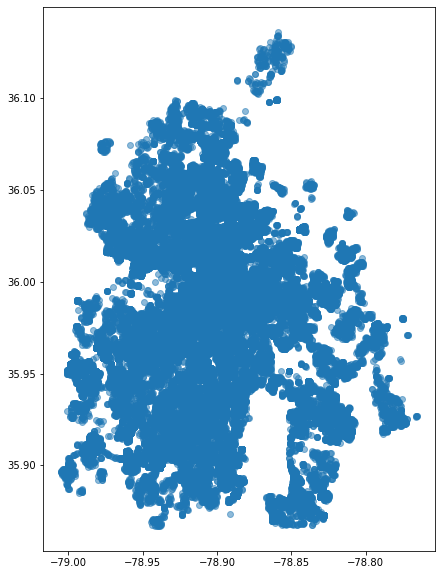

In [242]:
#Plot the dpd_w_policebeats data
fig, ax = plt.subplots(figsize = (10,10))
dpd_w_policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

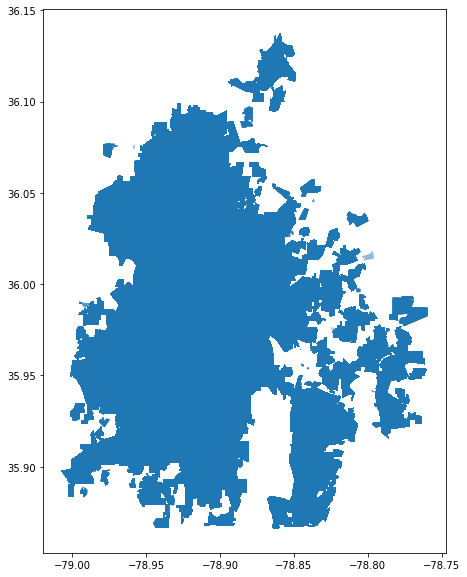

In [243]:
#Plot the policebeats_w_dpd data
fig, ax = plt.subplots(figsize = (10,10))
policebeats_w_dpd.plot(ax = ax, alpha = 0.5)
plt.show()

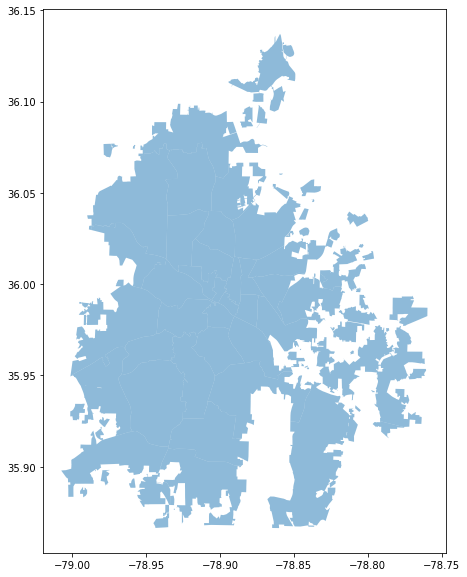

In [244]:
# Plot the beat data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

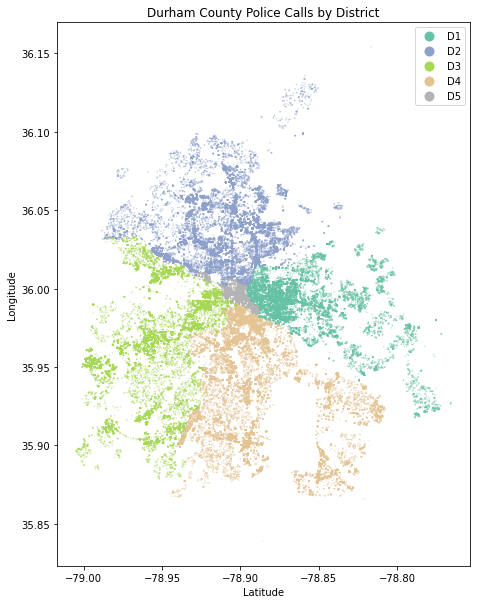

In [245]:
# Plot the call data by district using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpdcalls.plot(column='District', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", ax=ax, aspect=1);


ax.set(title='Durham County Police Calls by District')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

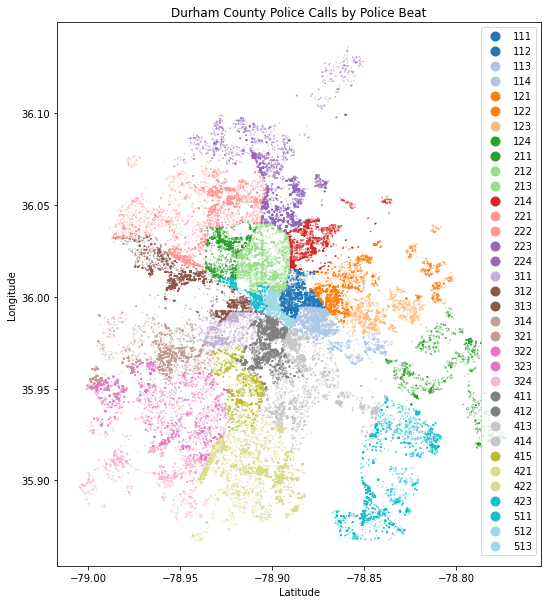

In [246]:
# Plot the dpd_w_policebeats data by Beat using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="tab20", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

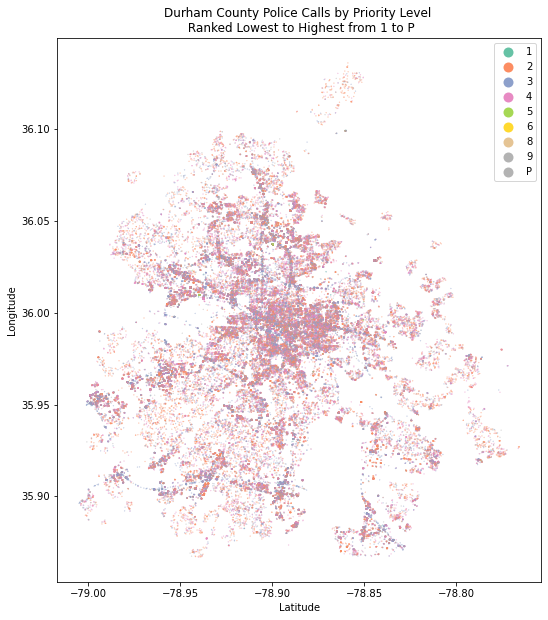

In [247]:
# Plot the call data by Priority using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

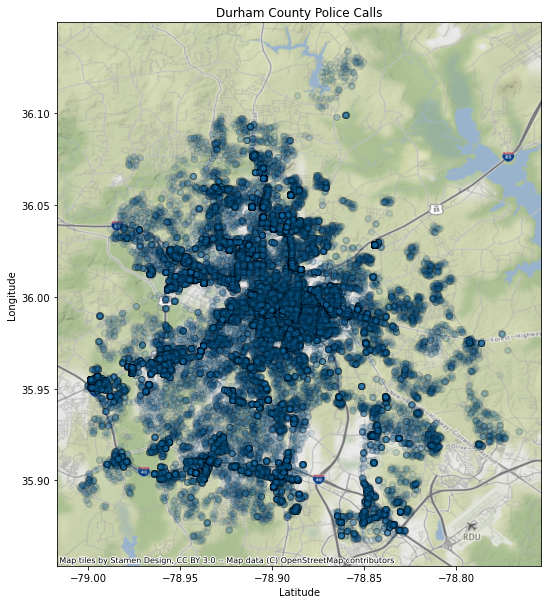

In [248]:
#Adding a base map to the caller data
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.05, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

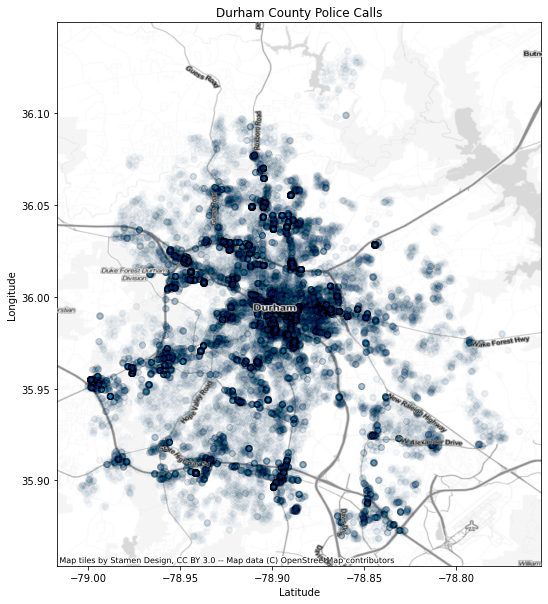

In [249]:
#Adding a base map to the caller data with labels
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.01, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLabels)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

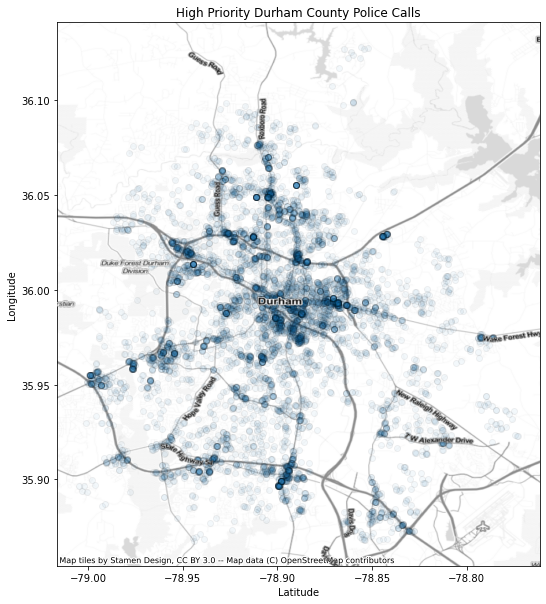

In [250]:
#Mapping high priority calls over a street map
PriorityCalls = dpd_w_policebeats.loc[dpd_w_policebeats['Priority'] == 'P']

ax = PriorityCalls.plot(figsize=(10, 10), alpha=0.05, edgecolor='k')
cx.add_basemap(ax, crs=PriorityCalls.crs, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs=PriorityCalls.crs, source=cx.providers.Stamen.TonerLabels)

ax.set(title='High Priority Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

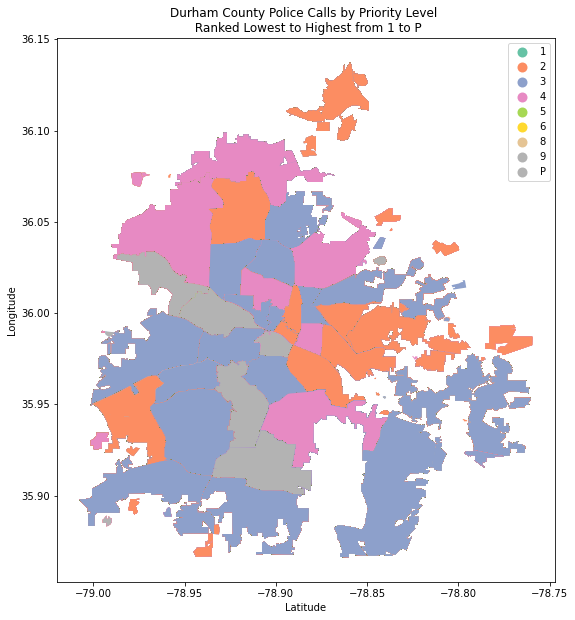

In [251]:
#Plotting the policebeats_w_dpd data by priority level
fig, ax = plt.subplots(figsize = (10,10))

policebeats_w_dpd.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

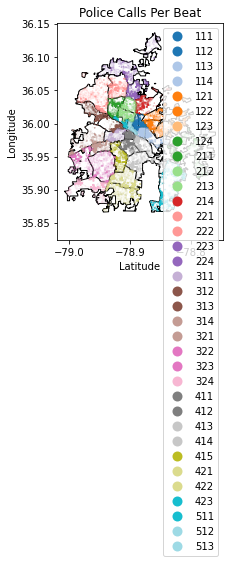

In [252]:
#Plot the two data sets together setting the aspect 'equal'
fig, ax = plt.subplots()

ax.set_aspect('equal')

policebeats.plot(ax=ax, color='white', edgecolor='black')

dpdcalls.plot(ax=ax, column='Beat', categorical=True, legend=True, marker='o', cmap='tab20', markersize=0.001)

ax.set(title='Police Calls Per Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

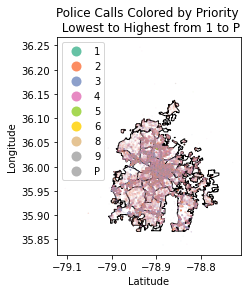

In [253]:
#Plot the two data sets together setting the aspect 'equal' by priority
fig, ax = plt.subplots()

ax.set_aspect('equal')

policebeats.plot(ax=ax, color='white', edgecolor='black')

dpdcalls.plot(ax=ax, column='Priority', categorical=True, legend=True, marker='o', cmap='Set2', markersize=0.001)

ax.set(title='Police Calls Colored by Priority \n Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

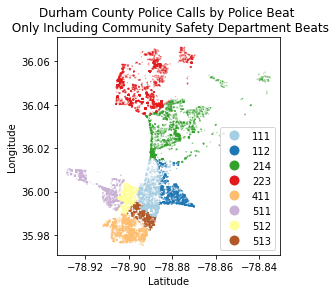

In [254]:
#Plot the two data sets together with only community safety beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
commsafe = dpd_w_policebeats.loc[dpd_w_policebeats['LAWBEAT'].isin(commsafe_list)].copy()
commsafe.head()

fig, ax=plt.subplots()

commsafe.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Paired", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat \n Only Including Community Safety Department Beats')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [255]:
#Count the calls in each beat
dpd_w_policebeats.groupby("Beat")["Beat"].count()

Beat
111    2727
112    2661
113    3095
114    3039
121    2771
122    3492
123    2888
124    2029
211    4174
212    3404
213    4017
214    3816
221    4271
222    3348
223    5329
224    2866
311    2846
312    2963
313    3754
314    3380
321    3333
322    2625
323    3076
324    3773
411    3925
412    3462
413    3660
414    3583
415    3124
421    4677
422    4630
423    5841
511    2562
512    2929
513    3617
Name: Beat, dtype: int64

In [256]:
#Find the beat with highest proportion of priority calls
#Create filtered call data with only P calls
Pcalls = dpdcalls.loc[(dpdcalls["Priority"] == "P")].copy()

In [257]:
#Grouping policebeats_w_dpd by beat
#Create a new data frame called allcalls
allcalls = policebeats_w_dpd.groupby(['Beat']).size().to_frame(name = 'calls_count').reset_index()
allcalls.head()

Beat  calls_count
0  111         2727
1  112         2661
2  113         3095
3  114         3039
4  121         2771

In [258]:
#Grouping priority calls by beat
#Creating new data frame called onlypcalls
onlypcalls = Pcalls.groupby(['Beat']).size().to_frame(name = 'pcalls_count').reset_index()
onlypcalls.head()

Beat  pcalls_count
0  111           236
1  112           216
2  113           274
3  114           192
4  121           209

In [259]:
#Add a proportions column to combcalls
combcalls = pd.merge(allcalls, onlypcalls, on ='Beat')

combcalls['prop_of_pcalls']= combcalls['pcalls_count'] / combcalls['calls_count']

combcalls.sort_values(by='prop_of_pcalls', inplace=True, ascending=False)

combcalls.head()

Beat  calls_count  pcalls_count  prop_of_pcalls
24  411         3925           374        0.095287
2   113         3095           274        0.088530
5   122         3492           303        0.086770
0   111         2727           236        0.086542
29  421         4677           388        0.082959

In [260]:
#Copy policebeats and rename column LAWBEAT
policebeats2 = policebeats.copy()

policebeats2.rename(columns=({'LAWBEAT':'Beat'}), inplace=True)

In [261]:
#Change Beat column to a string in policebeats2 data set
policebeats2["Beat"] = policebeats2["Beat"].map(lambda g: str(int(g+0.1)))

In [262]:
#Merge policebeats_w_dpd with combcalls
#Label merged data as combcalls_merge
combcalls_merge = pd.merge(combcalls, policebeats2, on ='Beat')

combcalls_merge.head(3)

Beat  calls_count  pcalls_count  prop_of_pcalls  OBJECTID     PERIMETER  \
0  411         3925           374        0.095287        67  24141.640625   
1  113         3095           274        0.088530        62  20667.539062   
2  122         3492           303        0.086770        54  36686.679688   

  STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre    ShapeSTLen  \
0      I        yes      D4  411       None  2.140812e+07  24141.641318   
1      I        yes      D1  113       None  2.159195e+07  20667.538873   
2      I        yes      D1  122       None  3.436298e+07  36686.681354   

                                            geometry  
0  POLYGON ((-78.90125 35.98965, -78.89941 35.988...  
1  POLYGON ((-78.87372 35.99369, -78.87458 35.991...  
2  POLYGON ((-78.84694 36.00614, -78.84634 36.006...

In [263]:
#Merged the caller data with combcalls by changing the index
combcalls_merge = policebeats2.set_index('Beat').join(combcalls.set_index('Beat'))

combcalls_merge.head(3)

OBJECTID     PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1  \
Beat                                                                     
111         50  28608.800781      I        yes      D1  111       None   
112         51  26265.849609      I        yes      D1  112       None   
113         62  20667.539062      I        yes      D1  113       None   

        ShapeSTAre    ShapeSTLen  \
Beat                               
111   2.010252e+07  28608.799743   
112   2.079934e+07  26265.852604   
113   2.159195e+07  20667.538873   

                                               geometry  calls_count  \
Beat                                                                   
111   POLYGON ((-78.89039 36.01517, -78.89038 36.015...         2727   
112   POLYGON ((-78.88787 36.01473, -78.88734 36.014...         2661   
113   POLYGON ((-78.87372 35.99369, -78.87458 35.991...         3095   

      pcalls_count  prop_of_pcalls  
Beat                                
111            236        0.086542  
112            216        0.081172  
113            274        0.088530

In [264]:
#Show merged data info
combcalls_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 83 entries, 111 to 513
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        83 non-null     int64   
 1   PERIMETER       83 non-null     float64 
 2   STATUS          83 non-null     object  
 3   CONTIGUOUS      83 non-null     object  
 4   LAWDIST         83 non-null     object  
 5   CAD             83 non-null     object  
 6   GIS_DataA1      0 non-null      object  
 7   ShapeSTAre      83 non-null     float64 
 8   ShapeSTLen      83 non-null     float64 
 9   geometry        83 non-null     geometry
 10  calls_count     83 non-null     int64   
 11  pcalls_count    83 non-null     int64   
 12  prop_of_pcalls  83 non-null     float64 
dtypes: float64(4), geometry(1), int64(3), object(5)
memory usage: 9.1+ KB


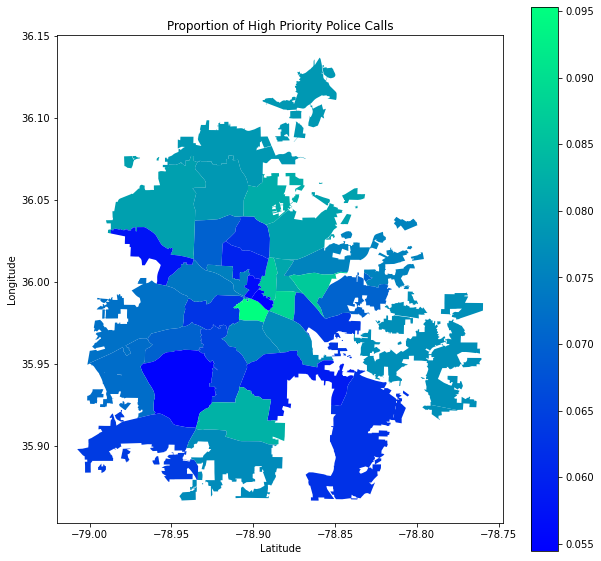

In [265]:
#Plot chloropleth map of proportion of high priority calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls_merge.plot(column='prop_of_pcalls',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Proportion of High Priority Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

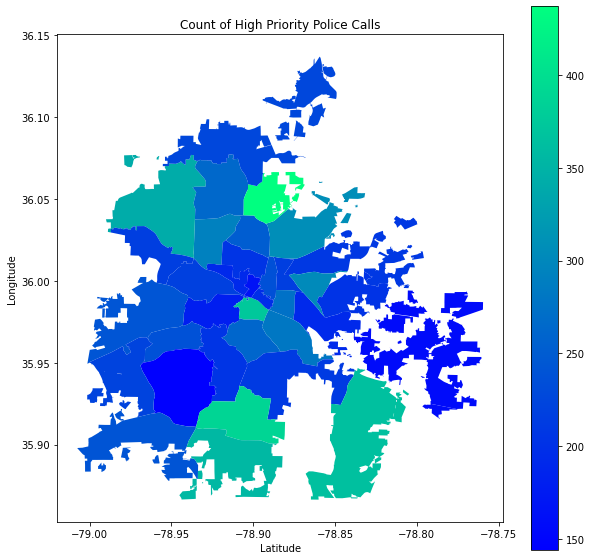

In [266]:
#Plot chloropleth map of number of high priority calls
fig, ax = plt.subplots(figsize = (10,10))

combcalls_merge.plot(column='pcalls_count',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Count of High Priority Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [267]:
#Find the beat with highest proportion of priority levels 2-6
#Create filtered call data with only 2-6 calls
twotosix = ['2', '3', '4', '5', '6']

twosixcalls = dpdcalls[dpdcalls['Priority'].isin(twotosix)]

twosixcalls.head()

Event Numb Case Numbe Call Date   Call Time             Source Priority  \
0    21000002       None  1/1/2021  12:00:28AM  Wireless 911 Call        3   
1    21000006       None  1/1/2021  12:01:41AM  Wireless 911 Call        3   
2    21000007       None  1/1/2021  12:01:45AM  Wireless 911 Call        3   
3    21000008       None  1/1/2021  12:02:10AM  Wireless 911 Call        3   
4    21000010       None  1/1/2021  12:02:39AM  Wireless 911 Call        3   

           Nature                  Address        X       Y District Beat  \
0  SOUND OF SHOTS       100 PEBBLESTONE DR  2055372  818537       D1  121   
1  SOUND OF SHOTS  CARROLL ST/MOREHEAD AVE  2024961  815902       D3  312   
2  SOUND OF SHOTS           1300 SHILEY DR  2038061  841530       D2  223   
3  SOUND OF SHOTS          0 EDGEBROOK CIR  2045947  796806       D4  414   
4  SOUND OF SHOTS             1200 ALMA ST  2037016  818259       D1  112   

                Dispositio  Cancelled                    geometry  
0  Resolved Without Report          0  POINT (-78.81280 35.99886)  
1  Resolved Without Report          0  POINT (-78.91562 35.99174)  
2  Resolved Without Report          0  POINT (-78.87123 36.06210)  
3  Resolved Without Report          0  POINT (-78.84478 35.93921)  
4  Resolved Without Report          0  POINT (-78.87486 35.99818)

In [268]:
#Grouping policebeats_w_dpd by beat
#Create a new data frame called allcalls
allcalls = policebeats_w_dpd.groupby(['Beat']).size().to_frame(name = 'calls_count').reset_index()
allcalls.head()

Beat  calls_count
0  111         2727
1  112         2661
2  113         3095
3  114         3039
4  121         2771

In [269]:
#Grouping 2-6 calls by beat
#Creating new data frame called onlytwosix
onlytwosix = twosixcalls.groupby(['Beat']).size().to_frame(name = '2_to_6_calls_count').reset_index()
onlytwosix.head()

Beat  2_to_6_calls_count
0  111                2422
1  112                2351
2  113                2751
3  114                2786
4  121                2530

In [270]:
#Add a proportions column to combcalls
combcalls2 = pd.merge(allcalls, onlytwosix, on ='Beat')

combcalls2['prop_of_2_6_calls']= combcalls2['2_to_6_calls_count'] / combcalls2['calls_count']

combcalls2.sort_values(by='prop_of_2_6_calls', inplace=True, ascending=False)

combcalls2.head()

Beat  calls_count  2_to_6_calls_count  prop_of_2_6_calls
27  414         3583                3318           0.926040
23  324         3773                3472           0.920223
21  322         2625                2411           0.918476
33  512         2929                2687           0.917378
3   114         3039                2786           0.916749

In [271]:
#Merge policebeats data with combcalls2
#Label merged data as combcalls2_merge
combcalls2_merge = pd.merge(combcalls2, policebeats2, on ='Beat')

combcalls2_merge.head(3)

Beat  calls_count  2_to_6_calls_count  prop_of_2_6_calls  OBJECTID  \
0  414         3583                3318           0.926040        88   
1  414         3583                3318           0.926040        94   
2  324         3773                3472           0.920223       106   

       PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0   98360.617188      I        yes      D4  414       None  1.342096e+08   
1    4287.661133      I        yes      D4  414       None  7.385015e+05   
2  128371.601562      I        yes      D3  324       None  1.523746e+08   

      ShapeSTLen                                           geometry  
0   98360.616926  POLYGON ((-78.87657 35.95794, -78.87649 35.957...  
1    4287.660656  POLYGON ((-78.83804 35.94471, -78.83821 35.944...  
2  128371.584023  POLYGON ((-78.96136 35.91888, -78.96118 35.918...

In [272]:
#Merged the data with combcalls by changing the index
combcalls2_merge = policebeats2.set_index('Beat').join(combcalls2.set_index('Beat'))

combcalls2_merge.head(3)

OBJECTID     PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1  \
Beat                                                                     
111         50  28608.800781      I        yes      D1  111       None   
112         51  26265.849609      I        yes      D1  112       None   
113         62  20667.539062      I        yes      D1  113       None   

        ShapeSTAre    ShapeSTLen  \
Beat                               
111   2.010252e+07  28608.799743   
112   2.079934e+07  26265.852604   
113   2.159195e+07  20667.538873   

                                               geometry  calls_count  \
Beat                                                                   
111   POLYGON ((-78.89039 36.01517, -78.89038 36.015...         2727   
112   POLYGON ((-78.88787 36.01473, -78.88734 36.014...         2661   
113   POLYGON ((-78.87372 35.99369, -78.87458 35.991...         3095   

      2_to_6_calls_count  prop_of_2_6_calls  
Beat                                         
111                 2422           0.888155  
112                 2351           0.883502  
113                 2751           0.888853

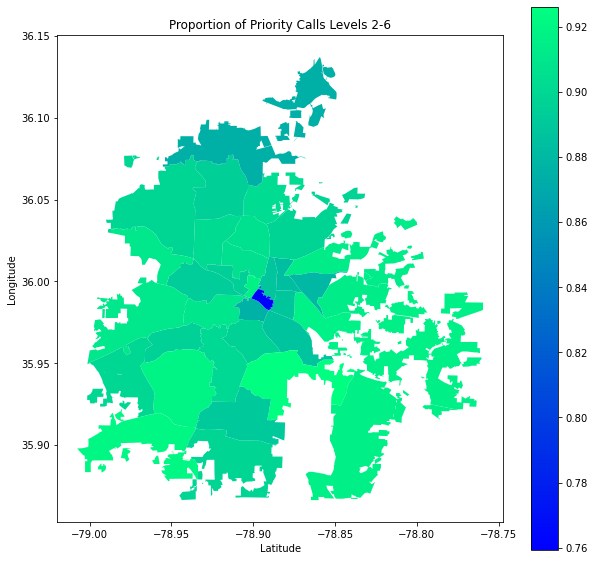

In [273]:
#Plot chloropleth map of proportion of priority 2-6 calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls2_merge.plot(column='prop_of_2_6_calls',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Proportion of Priority Calls Levels 2-6')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

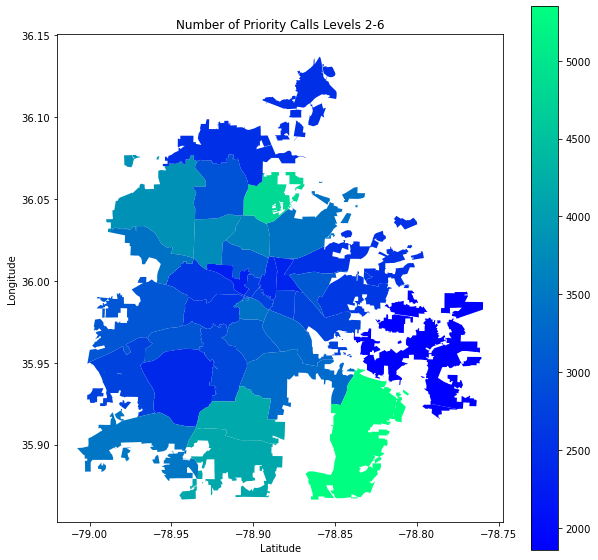

In [274]:
#Plot chloropleth map of number of priority 2-6 calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls2_merge.plot(column='2_to_6_calls_count',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Number of Priority Calls Levels 2-6')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [275]:
##Census Data Analysis
#Load in census data for North Carolina
ncblockmap = gpd.read_file('/Users/sadiesheridan/Desktop/tl_2021_37_tabblock20/tl_2021_37_tabblock20.shp')
ncblockmap.head()

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
0        37        037    020203      2037  370370202032037  Block 2037   
1        37        105    030401      1015  371050304011015  Block 1015   
2        37        183    053615      2052  371830536152052  Block 2052   
3        37        035    011501      2036  370350115012036  Block 2036   
4        37        037    020201      2003  370370202012003  Block 2003   

  MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0   G5040    R   None     None          S  2401181      1879  +35.7514163   
1   G5040    R   None     None          S   537166      1888  +35.4895705   
2   G5040    R   None     None          S        0     10154  +35.8791781   
3   G5040    R   None     None          S  2009262      7616  +35.5829239   
4   G5040    R   None     None          S  1557161     14689  +35.8325256   

     INTPTLON20                                           geometry  
0  -079.2909223  POLYGON ((-79.29947 35.75562, -79.29942 35.756...  
1  -079.1541245  POLYGON ((-79.16050 35.48907, -79.15995 35.489...  
2  -078.8085709  POLYGON ((-78.80964 35.87904, -78.80962 35.879...  
3  -081.0441821  POLYGON ((-81.05569 35.58896, -81.05537 35.589...  
4  -079.3723536  POLYGON ((-79.37919 35.83136, -79.37905 35.831...

In [276]:
#Set the crs for the census data
ncblockmap = ncblockmap.to_crs("EPSG:4326")

In [277]:
#Load in race data from census bureau
#Change id variable to GEOID20
racedata = pd.read_csv('/Users/sadiesheridan/Downloads/Race data/DECENNIALPL2020.P1_data_with_overlays_2022-06-06T132656.csv', skiprows = 1)
racedata['GEOID20'] = racedata['id'].str[-15:]
racedata.drop('id', axis=1, inplace=True)
racedata.head()

Geographic Area Name   !!Total:  \
0  Block 1000, Block Group 1, Census Tract 1.01, ...        108   
1  Block 1001, Block Group 1, Census Tract 1.01, ...         35   
2  Block 1002, Block Group 1, Census Tract 1.01, ...         38   
3  Block 1003, Block Group 1, Census Tract 1.01, ...         43   
4  Block 1004, Block Group 1, Census Tract 1.01, ...         31   

    !!Total:!!Population of one race:  \
0                                 102   
1                                  28   
2                                  34   
3                                  43   
4                                  30   

    !!Total:!!Population of one race:!!White alone  \
0                                               18   
1                                               13   
2                                               17   
3                                               21   
4                                                5   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                                 61                     
1                                                  5                     
2                                                  9                     
3                                                 19                     
4                                                 18                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                  3                             
1                                                  0                             
2                                                  0                             
3                                                  0                             
4                                                  0                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                1   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  0                                      
4                                                  0                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                 20           
1                                                 10           
2                                                  8           
3                                                  3           
4                                                  6           

    !!Total:!!Population of two or more races:  ...  \
0                                            6  ...   
1                                            7  ...   
2                                            4  ...   
3                                            0  ...   
4                                            1  ...   

    !!Total:!!Population of two or more races:!!Population of five races:  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

    !!Total:!!Population of two or more races:!!Population of five r

In [278]:
#Filter the block map to only include Durham blocks (63)
durhamblockmap = ncblockmap[ncblockmap["COUNTYFP20"]=="063"]
len(durhamblockmap), len(ncblockmap),len(racedata),len(policebeats)

(4401, 236638, 4402, 83)

In [279]:
#Merge the Durham block data with the race data
durhamracemap = pd.merge(racedata, durhamblockmap, on ='GEOID20')
durhamracemap.head()

Geographic Area Name   !!Total:  \
0  Block 1000, Block Group 1, Census Tract 1.01, ...        108   
1  Block 1001, Block Group 1, Census Tract 1.01, ...         35   
2  Block 1002, Block Group 1, Census Tract 1.01, ...         38   
3  Block 1003, Block Group 1, Census Tract 1.01, ...         43   
4  Block 1004, Block Group 1, Census Tract 1.01, ...         31   

    !!Total:!!Population of one race:  \
0                                 102   
1                                  28   
2                                  34   
3                                  43   
4                                  30   

    !!Total:!!Population of one race:!!White alone  \
0                                               18   
1                                               13   
2                                               17   
3                                               21   
4                                                5   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                                 61                     
1                                                  5                     
2                                                  9                     
3                                                 19                     
4                                                 18                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                  3                             
1                                                  0                             
2                                                  0                             
3                                                  0                             
4                                                  0                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                1   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  0                                      
4                                                  0                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                 20           
1                                                 10           
2                                                  8           
3                                                  3           
4                                                  6           

    !!Total:!!Population of two or more races:  ...  MTFCC20  UR20  UACE20  \
0                                            6  ...    G5040     R    None   
1                                            7  ...    G5040     R    None   
2                                            4  ...    G5040     R    None   
3                                            0  ...    G5040     R    None   
4                                            1  ...    G5040     R    None   

   UATYPE20  FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20    INTPTLON20  \
0      None           S   655575         0  +36.0194814  -078.8821382   
1      None           S    23209         0  +36.0205516  -078.8893121   
2      None           S    17466         0  +36.0205916  -078.8869754   
3      None           S    22809         0  +36.0205318  -078.8880959   
4      None           S    2

In [280]:
#Make index GEOID20
durhamracemap = durhamblockmap.set_index('GEOID20').join(racedata.set_index('GEOID20'))
durhamracemap.head(3)

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20      NAME20 MTFCC20  \
GEOID20                                                                        
370630018064007        37        063    001806      4007  Block 4007   G5040   
370630018017028        37        063    001801      7028  Block 7028   G5040   
370630021004022        37        063    002100      4022  Block 4022   G5040   

                UR20 UACE20 UATYPE20 FUNCSTAT20  ...  \
GEOID20                                          ...   
370630018064007    R   None     None          S  ...   
370630018017028    R   None     None          S  ...   
370630021004022    R   None     None          S  ...   

                  !!Total:!!Population of two or more races:!!Population of four races:!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race  \
GEOID20                                                                                                                                                                                          
370630018064007                                                  0                                                                                                                               
370630018017028                                                  0                                                                                                                               
370630021004022                                                  0                                                                                                                               

                  !!Total:!!Population of two or more races:!!Population of five races:  \
GEOID20                                                                                   
370630018064007                                                  0                        
370630018017028                                                  0                        
370630021004022                                                  0                        

                 !!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander  \
GEOID20                                                                                                                                                                                                          
370630018064007                                                  0                                                                                                                                               
370630018017028                                                  0                                                                                                                                               
370630021004022                                                  0                                                                                                                                               

                 !!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race  \
GEOID20                                                                                                                                                                               
370630018064007                                                  0                                                                                                                    
370630018017028                                                  0                                                                                                                    
370630021004022                                                  0                                                          

In [281]:
#Check the geometry of the merged data
durhamracemap.geometry

GEOID20
370630018064007    POLYGON ((-78.82464 36.01317, -78.82456 36.013...
370630018017028    POLYGON ((-78.80507 36.06321, -78.80467 36.063...
370630021004022    POLYGON ((-78.83005 36.15072, -78.83001 36.150...
370630020362000    POLYGON ((-78.91718 35.90556, -78.91702 35.905...
370630018017041    POLYGON ((-78.83393 36.05431, -78.83343 36.055...
                                         ...                        
370630022002048    POLYGON ((-78.89882 35.99520, -78.89875 35.995...
370630022001012    POLYGON ((-78.90950 36.00137, -78.90934 36.001...
370630007003016    POLYGON ((-78.92578 35.97207, -78.92571 35.972...
370630020262014    POLYGON ((-78.89767 35.94758, -78.89762 35.947...
370630013011001    POLYGON ((-78.89541 35.98186, -78.89538 35.981...
Name: geometry, Length: 4401, dtype: geometry

In [282]:
#Change the column names for durhamracemap
durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[#,@,&,!]', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[:]', '_')
durhamracemap.head()

warnings.filterwarnings('ignore')

In [283]:
#Find the proportion of specific races compared to the total population
durhamracemap['propwhite']= durhamracemap['total_population_of_one_race_white_alone'] / durhamracemap['total_']
durhamracemap['propblack']= durhamracemap['total_population_of_one_race_black_or_african_american_alone'] / durhamracemap['total_']

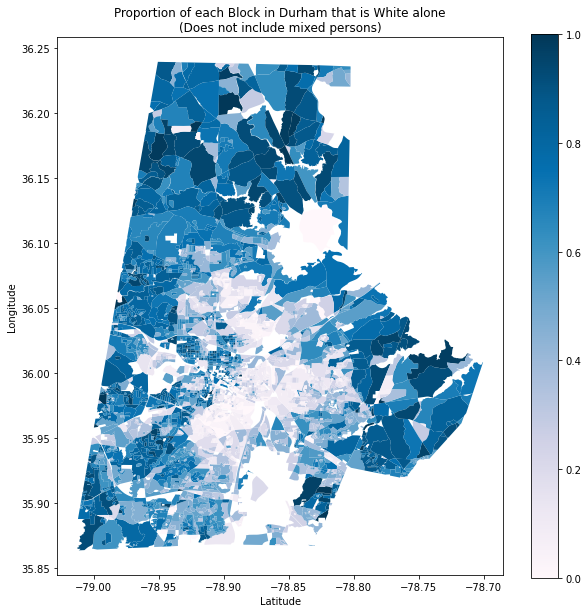

In [284]:
#Plot chloropleth map with merged data for white population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propwhite',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White alone\n(Does not include mixed persons)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

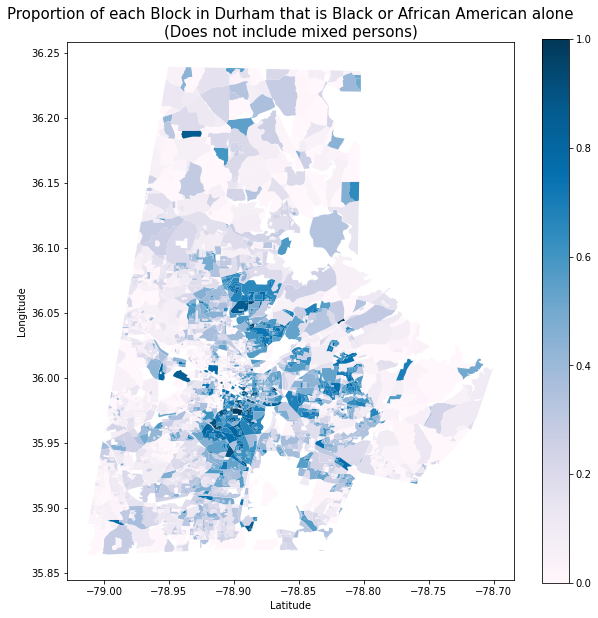

In [285]:
#Plot chloropleth map with merged data for Black population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propblack',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is Black or African American alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [301]:

#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockmap.index:
    cblock_geom = durhamblockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats = ncblockmap[ncblockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats['Beat'] = cblockDurhamBeats.index.map(lambda ii: cblockIndexToBeat[ii])

warnings.filterwarnings('ignore')

In [302]:
#Look at the first five rows of cblockDurhamBeats
cblockDurhamBeats.head()

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
88         37        063    002036      2000  370630020362000  Block 2000   
328        37        063    002020      1013  370630020201013  Block 1013   
338        37        063    001712      2001  370630017122001  Block 2001   
491        37        063    001708      4002  370630017084002  Block 4002   
536        37        063    001801      1025  370630018011025  Block 1025   

    MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
88    G5040    R   None     None          S   286743      3982  +35.9051346   
328   G5040    R   None     None          S    96212      4557  +35.8938510   
338   G5040    R   None     None          S  1274264     49745  +36.0548720   
491   G5040    R   None     None          S   363083      3607  +36.0776513   
536   G5040    R   None     None          S   107654      7350  +36.0128630   

       INTPTLON20                                           geometry  Beat  
88   -078.9104302  POLYGON ((-78.91718 35.90556, -78.91702 35.905...   421  
328  -078.9448088  POLYGON ((-78.94746 35.89382, -78.94727 35.893...   324  
338  -078.9454010  POLYGON ((-78.95554 36.05137, -78.95553 36.051...   221  
491  -078.8796988  POLYGON ((-78.88862 36.07515, -78.88839 36.075...   224  
536  -078.8662020  POLYGON ((-78.86911 36.01263, -78.86898 36.012...   121

In [303]:
#Merging race data into the police beat and block data
beatswithrace = gpd.sjoin(cblockDurhamBeats, durhamracemap)
beatswithrace.head(3)

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
88           37        063    002036      2000  370630020362000  Block 2000   
2904         37        063    002013      2001  370630020132001  Block 2001   
14347        37        063    002013      1000  370630020131000  Block 1000   

      MTFCC20 UR20 UACE20 UATYPE20  ...  \
88      G5040    R   None     None  ...   
2904    G5040    R   None     None  ...   
14347   G5040    R   None     None  ...   

      total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander  \
88                                                     0                                                                                                                                      
2904                                                   0                                                                                                                                      
14347                                                  0                                                                                                                                      

       total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_some_other_race  \
88                                                     0                                                                                                            
2904                                                   0                                                                                                            
14347                                                  0                                                                                                            

       total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander;_some_other_race  \
88                                                     0                                                                                                                                                 
2904                                                   0                                                                                                                                                 
14347                                                  0                                                                                                                                                 

      total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race  \
88                                                     0                                                                                                                    
2904                                                   0                                                                                                                    
14347                                                  0                                                                                                                    

      total_population_of_two_or_more_races_population_of_five_races_white;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race  \
88                                                     0                                                                                                                            
2904                                                   0                                                                                                                            
14347                                        

In [304]:
#Grouping the population by police beat
popsumbybeat = beatswithrace.groupby('Beat', as_index=False).sum()
popsumbybeat.head()

Beat    ALAND20  AWATER20    aland20  awater20  total_  \
0   111   17579442         0   18746893      6947   32720   
1   112   17718915         0   19961528      6947   27224   
2   113   20482283     13325   18511210      5125   35128   
3   114   56673958    441791   65789793    437720   53897   
4   121  154087358   1453287  147654293   1312755   66559   

   total_population_of_one_race_  total_population_of_one_race_white_alone  \
0                          29638                                     10243   
1                          25303                                      4356   
2                          33053                                      7084   
3                          50407                                      7336   
4                          62690                                     14281   

   total_population_of_one_race_black_or_african_american_alone  \
0                                              13202              
1                                              10636              
2                                              17577              
3                                              28270              
4                                              35776              

   total_population_of_one_race_american_indian_and_alaska_native_alone  ...  \
0                                                728                     ...   
1                                                918                     ...   
2                                                585                     ...   
3                                                751                     ...   
4                                                804                     ...   

   total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander  \
0                                                  0                                                                                                                                       
1                                                  0                                                                                                                                       
2                                                  0                                                                                                                                       
3                                                  0                                                                                                                                       
4                                                  0                                                                                                                                       

   total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_some_other_race  \
0                                                  6                                                                                                            
1                                                 14                                                                                                            
2                                                  0                                                                                                            
3                                                  3                                                                                                            
4                                                  4                                                                                                            

   total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander;_some_oth

In [305]:
#Adding beat geometry to popsumbybeat
raceineachbeat = pd.merge(popsumbybeat, policebeats, left_on='Beat', right_on='LAWBEAT')
raceineachbeat.head(3)

Beat   ALAND20  AWATER20   aland20  awater20  total_  \
0   111  17579442         0  18746893      6947   32720   
1   112  17718915         0  19961528      6947   27224   
2   113  20482283     13325  18511210      5125   35128   

   total_population_of_one_race_  total_population_of_one_race_white_alone  \
0                          29638                                     10243   
1                          25303                                      4356   
2                          33053                                      7084   

   total_population_of_one_race_black_or_african_american_alone  \
0                                              13202              
1                                              10636              
2                                              17577              

   total_population_of_one_race_american_indian_and_alaska_native_alone  ...  \
0                                                728                     ...   
1                                                918                     ...   
2                                                585                     ...   

      PERIMETER  STATUS  CONTIGUOUS  LAWDIST  LAWBEAT  CAD  GIS_DataA1  \
0  28608.800781       I         yes       D1      111  111        None   
1  26265.849609       I         yes       D1      112  112        None   
2  20667.539062       I         yes       D1      113  113        None   

     ShapeSTAre    ShapeSTLen  \
0  2.010252e+07  28608.799743   
1  2.079934e+07  26265.852604   
2  2.159195e+07  20667.538873   

                                            geometry  
0  POLYGON ((-78.89039 36.01517, -78.89038 36.015...  
1  POLYGON ((-78.88787 36.01473, -78.88734 36.014...  
2  POLYGON ((-78.87372 35.99369, -78.87458 35.991...  

[3 rows x 89 columns]

In [306]:
#Adding new columns to race in police beat data set
raceineachbeat['area'] = raceineachbeat.area
raceineachbeat['popdensity']= raceineachbeat['total_'] / raceineachbeat['area']
raceineachbeat['propwhite']= raceineachbeat['total_population_of_one_race_white_alone'] / raceineachbeat['total_']
raceineachbeat['propblack']= raceineachbeat['total_population_of_one_race_black_or_african_american_alone'] / raceineachbeat['total_']
raceineachbeat.head()

Beat   ALAND20  AWATER20   aland20  awater20  total_  \
0   111  17579442         0  18746893      6947   32720   
1   112  17718915         0  19961528      6947   27224   
2   113  20482283     13325  18511210      5125   35128   
3   114  56673958    441791  65789793    437720   53897   
4   114  56673958    441791  65789793    437720   53897   

   total_population_of_one_race_  total_population_of_one_race_white_alone  \
0                          29638                                     10243   
1                          25303                                      4356   
2                          33053                                      7084   
3                          50407                                      7336   
4                          50407                                      7336   

   total_population_of_one_race_black_or_african_american_alone  \
0                                              13202              
1                                              10636              
2                                              17577              
3                                              28270              
4                                              28270              

   total_population_of_one_race_american_indian_and_alaska_native_alone  ...  \
0                                                728                     ...   
1                                                918                     ...   
2                                                585                     ...   
3                                                751                     ...   
4                                                751                     ...   

   CONTIGUOUS  LAWDIST  LAWBEAT  CAD  GIS_DataA1    ShapeSTAre    ShapeSTLen  \
0         yes       D1      111  111        None  2.010252e+07  28608.799743   
1         yes       D1      112  112        None  2.079934e+07  26265.852604   
2         yes       D1      113  113        None  2.159195e+07  20667.538873   
3         yes       D1      114  114        None  6.103382e+07  53321.974873   
4          no       D1      114  114        None  4.508017e+04    871.390013   

                                            geometry          area  \
0  POLYGON ((-78.89039 36.01517, -78.89038 36.015...  1.866938e-04   
1  POLYGON ((-78.88787 36.01473, -78.88734 36.014...  1.931706e-04   
2  POLYGON ((-78.87372 35.99369, -78.87458 35.991...  2.004913e-04   
3  POLYGON ((-78.86954 35.99292, -78.86941 35.992...  5.666606e-04   
4  POLYGON ((-78.84601 35.96433, -78.84515 35.964...  4.184783e-07   

     popdensity  
0  1.752603e+08  
1  1.409325e+08  
2  1.752096e+08  
3  9.511336e+07  
4  1.287928e+11  

[5 rows x 91 columns]

In [307]:
#Sorting by population density
raceineachbeat.sort_values(by='popdensity', inplace=True, ascending=False)
raceineachbeat

Beat    ALAND20  AWATER20    aland20  awater20  total_  \
38   214  136688922    563391  151221387    837780   77576   
77   422  148967926   2348774  155861745   2093486  102540   
4    114   56673958    441791   65789793    437720   53897   
28   124  427340893   2614325  348738546   3098405  145937   
15   121  154087358   1453287  147654293   1312755   66559   
..   ...        ...       ...        ...       ...     ...   
49   224  230396358   2316341  316134844   3216570  104552   
63   324  180138852   1330520  198121917   1588121   94011   
78   423  295668144   3422861  294743488   3167351  146498   
56   321  167333985    943307  167538777   1089655   86762   
41   221  226893769   3415686  225192432   2858841  103723   

    total_population_of_one_race_  total_population_of_one_race_white_alone  \
38                          72752                                     12097   
77                          95313                                     48668   
4                           50407                                      7336   
28                         137747                                     79332   
15                          62690                                     14281   
..                            ...                                       ...   
49                          97711                                     53528   
63                          87091                                     62835   
78                         137394                                     64667   
56                          79937                                     56702   
41                          96995                                     77039   

    total_population_of_one_race_black_or_african_american_alone  \
38                                              44504              
77                                              33117              
4                                               28270              
28                                              43310              
15                                              35776              
..                                                ...              
49                                              33450              
63                                              14015              
78                                              46537              
56                                               9845              
41                                              11672              

    total_population_of_one_race_american_indian_and_alaska_native_alone  ...  \
38                                                487                     ...   
77                                                376                     ...   
4                                                 751                     ...   
28                                                336                     ...   
15                                                804                     ...   
..                                                ...                     ...   
49                                                623                     ...   
63                                                115                     ...   
78                                                608                     ...   
56                                                299                     ...   
41                                                311                     ...   

    CONTIGUOUS  LAWDIST  LAWBEAT  CAD  GIS_DataA1    ShapeSTAre  \
38          no       D2      214  214        None  2.000346e+04   
77          no       D4      422  422        None  4.018085e+04   
4           no       D1      114  114        None  4.508017e+04   
28          no       D1      124  124        None  1.472133e+05   
15          no       D1      121  121        None  6.720971e+04   
..         ...      ...      ...  ...         ...           ...   
49         yes       D2      224  224        None  

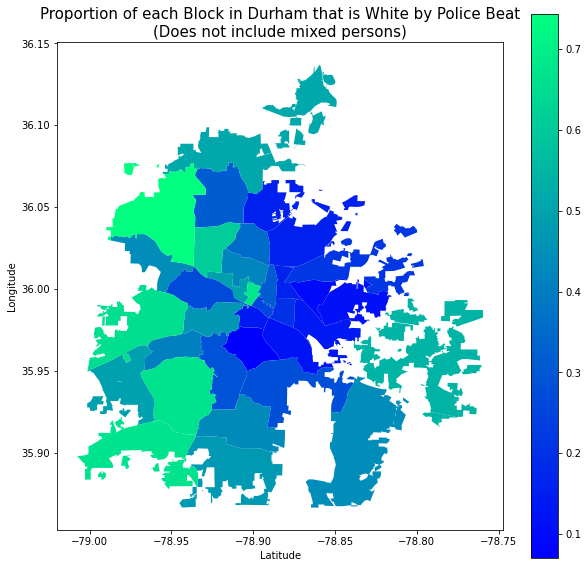

In [308]:
#Plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='propwhite',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

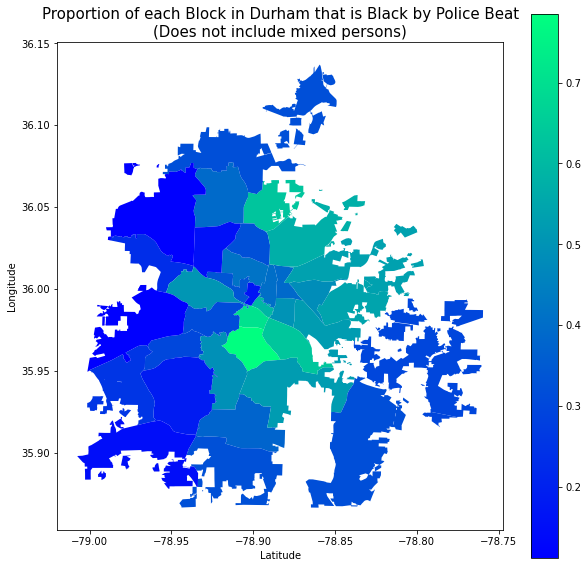

In [309]:
#Plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='propblack',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [315]:
#Seeing how many blocks there are per beat
blocksperbeat = beatswithrace.groupby( ["Beat"] ).size().to_frame(name = 'block_count').reset_index()
meanblocksperbeat = blocksperbeat[["block_count"]].mean()
meanblocksperbeat

block_count    699.171429
dtype: float64